This task's main purpose is finding a corelation between approval of LGBTI persons by the population and the countries' LGBTI related laws in the year 2020. 

First problem that I have encountered during this task was the unavailability of a suitable and comprehensive dataset that focuses on European countries. I manually selected the data on European countries’ GAI (The Global Acceptance Index is a measure of social acceptance of LGBTI people and rights in 175 countries, based on survey data from 1981 to 2020.) scores from “Social Acceptance of LGBTI People in 175 Countries and Locations from 1981 to 2020” report by Williams Institue and Created my own CSV file. As my second dataset, I harvested the data of European LGBTI-related laws from “LGBT+ rights and issues in Europe” report by House of Commons Library. By extracting the relevant data points and their organization, I constructed a new, structured file in CSV format. The importance of this step is the challenge in real-world data analysis, when, due to imperfect datasets, one needs to be ready to find alternative ways to discover the desired data.

During the data analysis process, another issue I was faced with was the inconsistency in data types across different columns. This inconsistency hindered the ability to perform certain operations and generate accurate visualizations. To address this issue, I identified the appropriate data types for each column and converted them accordingly.

Lastly, as I turned the “Yes” and “No” entries into boolean values, I was faced with the presence of “Limited” entries in certain columns. Thus, to maintain consistency and facilitate effective analysis, I decided to transform them into “NaN” values, ultimately reducing their impact on the results.


Laws dataset:
0     COUNTRY  Same-sex acts legal? Date of decriminalisation  \
1     Albania                  True                      1995   
2     Andorra                  True                      1990   
3     Armenia                  True                      2003   
4     Austria                  True                      1971   
5  Azerbaijan                  True                      2000   

0  Constitutional protection Broad protection  Employment protection  \
1                      False             True                   True   
2                      False             True                   True   
3                      False            False                  False   
4                      False             True                   True   
5                      False            False                  False   

0 Hate crime protection Incitement protection Ban conversion therapies  \
1                  True                  True                    False   
2             

/var/folders/h4/x4ymz6s93h5ct999hctzmjc40000gn/T/ipykernel_47583/1777984342.py:21: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



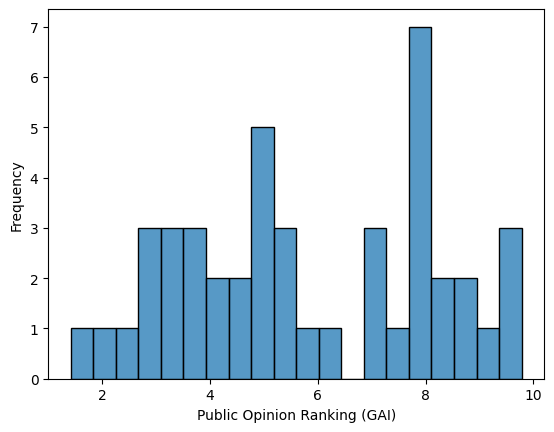

In [183]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# We load our first data set that contains laws
laws_data = pd.read_csv('/Users/atillaarslan/Downloads/Data for task/laws_2020.csv', names=['temp'])

laws_data = laws_data['temp'].str.split(';', expand=True)
column_names = laws_data.iloc[0].str.strip()
laws_data.columns = column_names
laws_data = laws_data.iloc[1:]

# We load our second data set that contains the acceptance rates
opinion_data = pd.read_csv('/Users/atillaarslan/Downloads/Data for task/acceptance_2020.csv', sep=';')

# We Convert the column to desired data type
opinion_data['GAI'] = opinion_data['GAI'].astype(float)
opinion_data['COUNTRY'] = opinion_data['COUNTRY'].astype(str)
laws_data = laws_data.replace({'Yes': True, 'No': False})
laws_data['COUNTRY'] = laws_data['COUNTRY'].astype(str)
opinion_data['RANK'] = opinion_data['RANK'].astype(int)


# We can explore the dataset now
print("Laws dataset:")
print(laws_data.head())
print(laws_data.info())

print("\nPublic opinion dataset:")
print(opinion_data.head())
print(opinion_data.info())
print(opinion_data.describe(include='all'))



# We can take a look at our data with plotting our histogram for the second data set
sns.histplot(data=opinion_data, x='GAI', bins=20)
plt.xlabel('Public Opinion Ranking (GAI)')
plt.ylabel('Frequency')
plt.show()

COUNTRY                       object
Same-sex acts legal?            bool
Date of decriminalisation     object
Constitutional protection       bool
Broad protection              object
Employment protection           bool
Hate crime protection         object
Incitement protection         object
Ban conversion therapies      object
Same sex marriage               bool
Civil unions                    bool
Joint adoption                  bool
Second parent adoption          bool
RANK                           int64
GAI                          float64
dtype: object


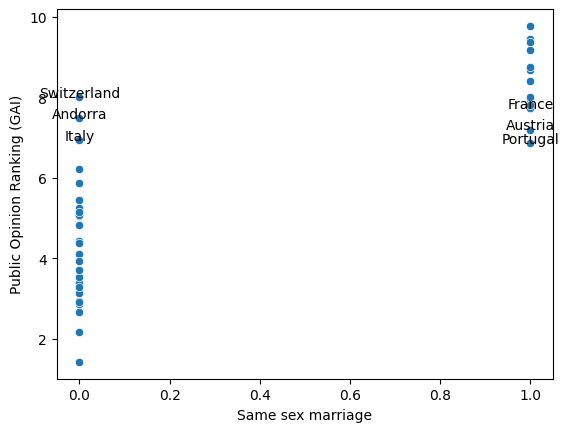

In [185]:
# We merge the datasets 
merged_data = pd.merge(laws_data, opinion_data, on='COUNTRY', how='inner')
print(merged_data.dtypes)
# We replace "Limited" values with np.nan in the relevant columns
merged_data[['Constitutional protection', 'Broad protection', 'Employment protection', 'Hate crime protection', 'Incitement protection', 'Ban conversion therapies', 'Same sex marriage', 'Civil unions', 'Joint adoption', 'Second parent adoption']] = merged_data[
['Constitutional protection', 'Broad protection', 'Employment protection', 'Hate crime protection', 'Incitement protection', 'Ban conversion therapies', 'Same sex marriage', 'Civil unions', 'Joint adoption', 'Second parent adoption']].replace('Limited', np.nan)

# As an example, we can create a scatter plot between 'GAI' and 'Same sex marriage'
highest_gai_no_ssm = merged_data[(merged_data['Same sex marriage'] == False) & (merged_data['GAI'] != np.nan)].nlargest(3, 'GAI')
lowest_gai_ssm = merged_data[(merged_data['Same sex marriage'] == True) & (merged_data['GAI'] != np.nan)].nsmallest(3, 'GAI')
fig, ax = plt.subplots()
sns.scatterplot(data=merged_data, x='Same sex marriage', y='GAI', ax=ax)
ax.set_xlabel('Same sex marriage')
ax.set_ylabel('Public Opinion Ranking (GAI)')

# Annotate the 3 highest GAI without same-sex marriage
for _, row in highest_gai_no_ssm.iterrows():
    ax.text(row['Same sex marriage'], row['GAI'], row['COUNTRY'], ha='center')

# Annotate the 3 lowest GAI with same-sex marriage
for _, row in lowest_gai_ssm.iterrows():
    ax.text(row['Same sex marriage'], row['GAI'], row['COUNTRY'], ha='center')

plt.show()

After examination of the presented scatterplot, it is evident that, despite the significant prevalence of positive public opinion towards the LGBTI community, the implementation of fundamental laws, including those as essential as same-sex marriage, remains a complex challenge for governments in establishing them as a constitutional right for citizens. A significant illustration of this phenomenon can be observed in the case of Switzerland. Despite boasting public opinion ratings that surpass those of Austria and Portugal, and closely align with those of France, all three of which have legally recognized same-sex marriage as a constitutional right, Switzerland, a direct democracy, has yet to follow suit. This trend is similarly reflected in the instances of Andorra and Italy.

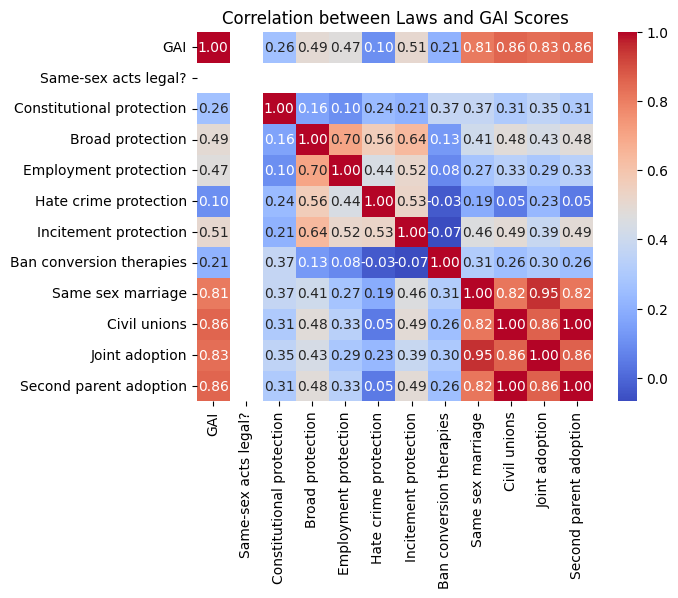

In [186]:
# We can create correlation matrices from the data in our columns
corr_matrix = merged_data[['GAI', 'Same-sex acts legal?', 'Constitutional protection', 'Broad protection',
                            'Employment protection', 'Hate crime protection', 'Incitement protection',
                            'Ban conversion therapies', 'Same sex marriage', 'Civil unions',
                            'Joint adoption', 'Second parent adoption']].corr()

# Then we create a heatmap to be able to analyze the corelation between GAI scores and laws.
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation between Laws and GAI Scores')
plt.show()

After the analysis of the heatmap, it can be inferred that the legal recognition and protection of civil unions and same-sex marriages serve as a catalyst for the establishment of joint and second parent adoption rights. This inference is further supported by the Pearson correlation coefficients, namely, 0.86 between civil union and joint adoption and 1.00 between civil unions and second parent adoption; 0.95 between same sex marriage and joint adoption, 0.82 between same sex marriage and second parent adoption. These findings suggest a strong positive correlation between these four categories. Conversely, the data reveals a negative correlation between GAI scores and the presence of hate crime protection laws, particularly, 0.10 correlation score between hate crime protection and GAI. Consequently, LGBTI individuals residing in countries with low GAI scores, such as Turkey, Russia, Belarus, and Poland, are often compelled to emmigrate due to the lack of legal protections against hate crimes. This absence of governmental support subjects LGBTI individuals to a daily struggle for survival and heightens their vulnerability to imminent hate crimes, a phenomenon that can be characterized as "state-sponsored hate crime."

In [187]:
binary_columns = ['Constitutional protection', 'Broad protection', 'Employment protection', 'Hate crime protection', 'Incitement protection', 'Ban conversion therapies', 'Same sex marriage', 'Civil unions', 'Joint adoption', 'Second parent adoption']
# We didn't add the "Same-sex act legal?" column to the correlations since all the entries are yes. 
for col in binary_columns:
    # We Replaced missing values with a fill value 
    merged_data[col] = merged_data[col].fillna(value=False)
    merged_data[col] = merged_data[col].astype(int)


correlations = {}

for col in binary_columns:
    rho, _ = stats.spearmanr(merged_data['GAI'], merged_data[col])
    correlations[col] = rho

print("Correlations:")
for col, rho in correlations.items():
    print(f"{col}: {rho:.4f}")

Correlations:
Constitutional protection: 0.2632
Broad protection: 0.2957
Employment protection: 0.4580
Hate crime protection: 0.0337
Incitement protection: 0.5522
Ban conversion therapies: 0.1983
Same sex marriage: 0.7892
Civil unions: 0.8426
Joint adoption: 0.8050
Second parent adoption: 0.8426


/var/folders/h4/x4ymz6s93h5ct999hctzmjc40000gn/T/ipykernel_47583/2880119583.py:5: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/var/folders/h4/x4ymz6s93h5ct999hctzmjc40000gn/T/ipykernel_47583/2880119583.py:5: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/var/folders/h4/x4ymz6s93h5ct999hctzmjc40000gn/T/ipykernel_47583/2880119583.py:5: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_opt

The relatively weak correlation observed between GAI scores and hate crime protection laws may be attributed to the broader legal and political contexts of certain countries. It is possible that some nations lack comprehensive human rights legislation, which may result in the absence of hate crime protection laws specifically aimed at safeguarding the rights of LGBTI individuals. This could be the case despite the population's positive and moderate attitudes towards LGBTI persons.

In such instances, the absence of hate crime protection laws may not reflect a deliberate disregard for the rights of LGBTI individuals by citizens, but rather a more general lack of legal provisions for the protection of human rights by governments. Nonetheless, this lack of legal protection can still have significant consequences for the safety and well-being of LGBTI individuals, who may be at greater risk of experiencing hate crimes in the absence of specific legal provisions to address such crimes.

In [188]:
# We can further our analysis by looking into the countries that have lower GAI than 4 and don't have hate crime protection laws or don't ban conversion therapies
filtered_countries = merged_data[(merged_data['GAI'] < 4) & (merged_data['Hate crime protection'] == False) & (merged_data['Ban conversion therapies'] == False)]
bold = '\033[1m'
reset = '\033[0m'
print(f"{bold}Low GAI and no protection from hate crime or conversion therapy{reset}\n")
print(filtered_countries[['COUNTRY', 'GAI', 'Hate crime protection', 'Ban conversion therapies']])

# More interestingly, we can observe the countries with high GAI but still don't have hate crime protection laws or don't ban conversion therapies
filtered_countries = merged_data[(merged_data['GAI'] > 4) & (merged_data['Hate crime protection'] == False) & (merged_data['Ban conversion therapies'] == False)]
print(f"{bold}\nHigh GAI and no protection from hate crime or conversion therapy{reset}\n", filtered_countries[['COUNTRY', 'GAI', 'Hate crime protection', 'Ban conversion therapies']])

# We can also see the countries with low GAI but have hate crime protection
filtered_countries = merged_data[(merged_data['GAI'] < 4) & (merged_data['Hate crime protection'] == True) & (merged_data['Ban conversion therapies'] == False)]
print(f"{bold}\nLow GAI and has protection from hate crime but not conversion therapy{reset}\n", filtered_countries[['COUNTRY', 'GAI', 'Hate crime protection', 'Ban conversion therapies']])

Low GAI and no protection from hate crime or conversion therapy

       COUNTRY   GAI  Hate crime protection  Ban conversion therapies
2      Armenia  2.17                      0                         0
4   Azerbaijan  1.42                      0                         0
5      Belarus  3.38                      0                         0
33      Russia  3.28                      0                         0
40      Turkey  3.94                      0                         0
41     Ukraine  2.91                      0                         0

High GAI and no protection from hate crime or conversion therapy
            COUNTRY   GAI  Hate crime protection  Ban conversion therapies
10  Czech Republic  5.87                      0                         0
12         Estonia  5.25                      0                         0
19         Iceland  9.78                      0                         0
20         Ireland  8.41                      0                         0
21      

The presence of ideological inconsistencies between governments and their electorate, regarding the protection and promotion of LGBTI rights, is a significant concern. This divergency hints a failure of representation in governments, despite the prevailing attitudes of the electorate support for the enactment of laws aimed at safeguarding the well-being of LGBTI individuals.

The persistence of such ideological incongruities may have serious implications for the social and political stability of a country. When governments fail to reflect the values and beliefs of their citizens, it can lead to a disintrigration of trust and confidence in the political system. In the context of LGBTI individuals, this may result in a lack of legal protections and recognition, as well as an increase in discrimination and violence.

In [207]:
# We can use SQL queries to further our 
engine = create_engine('sqlite:///lgbti_data.db')
merged_data.to_sql('lgbti_data', engine, if_exists='replace', index=False)

def execute_query(query):
    engine = create_engine('sqlite:///lgbti_data.db')
    connection = engine.connect()
    result = pd.read_sql_query(query, connection)
    connection.close()
    return result

query = """
SELECT COUNTRY, GAI
FROM lgbti_data
ORDER BY GAI DESC
LIMIT 5;
"""

results = execute_query(query)
print("Countries with the highest GAI scores\n", results)

query2 = """
SELECT COUNTRY, GAI,
       "Same-sex acts legal?", "Constitutional protection", "Broad protection", "Employment protection",
       "Hate crime protection", "Incitement protection", "Ban conversion therapies",
       "Same sex marriage", "Civil unions", "Joint adoption", "Second parent adoption"
FROM lgbti_data
WHERE "Same-sex acts legal?" = 1
  AND "Constitutional protection" = 1
  AND "Broad protection" = 1
  AND "Employment protection" = 1
  AND "Hate crime protection" = 1
  AND "Incitement protection" = 1
  AND "Ban conversion therapies" = 1
  AND "Same sex marriage" = 1
  AND "Civil unions" = 1
  AND "Joint adoption" = 1
  AND "Second parent adoption" = 1;
"""

results2 = execute_query(query2)
print("\n Countries with the highest number of legal protections and rights:\n" , results2)

query3 = """
SELECT COUNTRY, GAI, "Same sex marriage", "Hate crime protection"
FROM lgbtq_data
WHERE "Same sex marriage" = 1
  AND "Hate crime protection" = 1
ORDER BY GAI DESC;
"""

results3 = execute_query(query3)

print("\n Countries that have same sex marriage and hate crime protection laws:\n" , results3)

query4 = """
SELECT COUNTRY, GAI, "Hate crime protection"
FROM lgbtq_data
WHERE "Hate crime protection" = 1
ORDER BY GAI DESC;
"""
results4 = execute_query(query4)

print("\n Countries that have hate crime protection laws:\n" , results4)

Countries with the highest GAI scores
        COUNTRY   GAI
0      Iceland  9.78
1  Netherlands  9.46
2       Norway  9.38
3       Sweden  9.18
4        Spain  8.77

 Countries with the highest number of legal protections and rights:
   COUNTRY   GAI  Same-sex acts legal?  Constitutional protection  \
0   Malta  8.01                     1                          1   

   Broad protection  Employment protection  Hate crime protection  \
0                 1                      1                      1   

   Incitement protection  Ban conversion therapies  Same sex marriage  \
0                      1                         1                  1   

   Civil unions  Joint adoption  Second parent adoption  
0             1               1                       1  

 Countries that have same sex marriage and hate crime protection laws:
     COUNTRY   GAI  Same sex marriage  Hate crime protection
0    Norway  9.38                  1                      1
1    Sweden  9.18                